In [29]:
# Importing the Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

In [72]:
# adjusting the configuration of the plots 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [92]:
# reading the data

df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [93]:
# Checking for missing data

missing_columns = df.columns[df.isnull().any()]

for col in missing_columns:
    data_pct_missing = np.mean(df[col].isnull())
    rounded_pct_missing = round(data_pct_missing * 100, 1)
    print("{} - {}%".format(col, rounded_pct_missing))

rating - 1.0%
released - 0.0%
score - 0.0%
votes - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.3%
gross - 2.5%
company - 0.2%
runtime - 0.1%


In [94]:
# Identify columns with missing values
missing_column_names = ['budget']  

# Create a DataFrame containing only rows with missing values in the specified columns
movies_with_missing_data = df[df[missing_column_names].isnull().any(axis=1)]

# Print the names of movies with missing values in the specified columns
print("Movies with missing values:")
print(movies_with_missing_data['name'])

Movies with missing values:
16                  Fame
19            Stir Crazy
24          Urban Cowboy
25        Altered States
26       Little Darlings
              ...       
7657                Leap
7659           I Am Fear
7660    Aloha Surf Hotel
7664         Dream Round
7667           Tee em el
Name: name, Length: 2171, dtype: object


In [95]:
# Out of 7668 movies, 2247 movies have missing data. 

In [96]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [97]:
# Drop rows with missing budget values
df_cleaned = df.dropna(subset=['budget'])

# Print the cleaned DataFrame
df_cleaned.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [98]:
# Identify columns with missing values
missing_column_names = ['gross']  

# Create a DataFrame containing only rows with missing values in the specified columns
movies_with_missing_data = df_cleaned[df_cleaned[missing_column_names].isnull().any(axis=1)]

# Print the names of movies with missing values in the specified columns
print("Movies with missing values:")
print(movies_with_missing_data['name'])

Movies with missing values:
27         Raise the Titanic
47            The Boogey Man
49        Lion of the Desert
52      Can't Stop the Music
59                 Hangar 18
                ...         
7661        Love by Drowning
7662           The Robinsons
7663            More to Life
7665           Saving Mbango
7666            It's Just Us
Name: name, Length: 61, dtype: object


In [99]:
# Drop rows with missing budget values
df_cleaned_2 = df_cleaned.dropna(subset=['gross'])

# Print the cleaned DataFrame
df_cleaned_2.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


In [100]:
# Identify columns with missing values
missing_column_names = ['rating']  

# Create a DataFrame containing only rows with missing values in the specified columns
movies_with_missing_data = df_cleaned_2[df_cleaned_2[missing_column_names].isnull().any(axis=1)]

# Print the names of movies with missing values in the specified columns
print("Movies with missing values:")
print(movies_with_missing_data['name'])

Movies with missing values:
505       Nausicaä of the Valley of the Wind
1852                       Y Tu Mamá También
2311           Return of the Living Dead III
2313    Jason Goes to Hell: the Final Friday
2417                                Madadayo
3114                          Happy Together
3446                          Eyes Wide Shut
3817                                 Brother
3890                          Monster's Ball
3944                         Ichi the Killer
6983                                      31
7615                            Clinton Road
Name: name, dtype: object


In [101]:
# Identify columns with missing values
missing_column_names = ['company']  

# Create a DataFrame containing only rows with missing values in the specified columns
movies_with_missing_data = df_cleaned_2[df_cleaned_2[missing_column_names].isnull().any(axis=1)]

# Print the names of movies with missing values in the specified columns
print("Movies with missing values:")
print(movies_with_missing_data['name'])

Movies with missing values:
633           The Bear
1572    Heart of Dixie
Name: name, dtype: object


In [102]:
# Identify columns with missing values
missing_column_names = ['runtime']  

# Create a DataFrame containing only rows with missing values in the specified columns
movies_with_missing_data = df_cleaned_2[df_cleaned_2[missing_column_names].isnull().any(axis=1)]

# Print the names of movies with missing values in the specified columns
print("Movies with missing values:")
print(movies_with_missing_data['name'])

Movies with missing values:
6195    One for the Money
Name: name, dtype: object


In [103]:
# Filling the company names as per the web
company_name_mapping = {
    "The Bear": "TriStar Pictures",
    "Heart of Dixie": "Martin Davidson"
}

for movie_name, company_name in company_name_mapping.items():
    df_cleaned_2.loc[df_cleaned_2['name'] == movie_name, 'company'] = company_name

verify_df = df_cleaned_2[df_cleaned_2['name'] == 'Heart of Dixie']
verify_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,Martin Davidson,95.0


In [104]:
movie_name = "One for the Money"
runtime = 91.0

df_cleaned_2.loc[df_cleaned_2['name'] == movie_name, 'runtime'] = runtime

# Filling the runtime 
verify_df = df_cleaned_2[df_cleaned_2['name'] == 'One for the Money']
verify_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,91.0


In [105]:
# Checking again for missing values in the cleaned_2 df

for col in df_cleaned_2.columns:
    data_pct_missing = np.mean(df_cleaned_2[col].isnull())
    rounded_pct_missing = round(data_pct_missing* 100, 1)
    print("{} - {}%".format(col, rounded_pct_missing))

name - 0.0%
rating - 0.2%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [106]:
# Treating 0.2% rating
df_cleaned_2['rating'].fillna('U', inplace =True)

C:\Users\user\AppData\Local\Temp\ipykernel_5044\3564743235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['rating'].fillna('U', inplace =True)


In [107]:
for col in df_cleaned_2.columns:
    data_pct_missing = np.mean(df_cleaned_2[col].isnull())
    rounded_pct_missing = round(data_pct_missing* 100, 1)
    print("{} - {}%".format(col, rounded_pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [108]:
df_cleaned_2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [109]:
# Chaning the dtype of budget and gross

df_cleaned_2['budget'] = df_cleaned_2['budget'].astype('int64')
df_cleaned_2['gross'] = df_cleaned_2['gross'].astype('int64')

C:\Users\user\AppData\Local\Temp\ipykernel_5044\1626506878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['budget'] = df_cleaned_2['budget'].astype('int64')
C:\Users\user\AppData\Local\Temp\ipykernel_5044\1626506878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['gross'] = df_cleaned_2['gross'].astype('int64')


In [110]:
df_cleaned_2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [111]:
# The Released and the Year don't match therefore, we create a new column as correct_year to take the year from the release.


# First converting the type of the release, following the string manipulation to extract the year from released. 
df_cleaned_2['correct_year'] = df['released'].astype(str).str.extract(r'(\d{4})')
df_cleaned_2

C:\Users\user\AppData\Local\Temp\ipykernel_5044\3519468849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['correct_year'] = df['released'].astype(str).str.extract(r'(\d{4})')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [112]:
df_cleaned_2.drop(columns=['year'], inplace=True)
df_cleaned_2

C:\Users\user\AppData\Local\Temp\ipykernel_5044\2016906351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2.drop(columns=['year'], inplace=True)


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [113]:
df_cleaned_2 = df_cleaned_2.sort_values(by=['gross'], inplace = False, ascending = False)

In [114]:
# Dropping any duplicates

df_cleaned_2 = df_cleaned_2.drop_duplicates() 

In [115]:
# seeing what things are most correlated 
# budget and company might be related to the revenue


<function matplotlib.pyplot.show(close=None, block=None)>

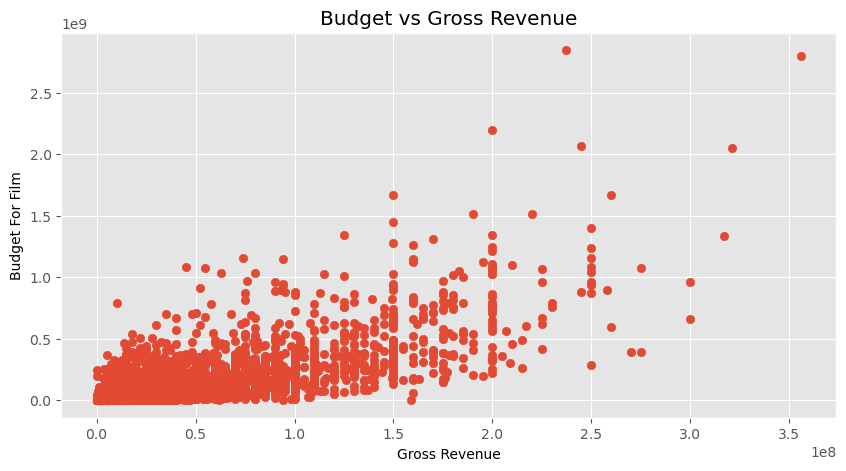

In [116]:
# Scatter plot to visualize the actual relationship

plt.scatter(x = df_cleaned_2['budget'], y = df_cleaned_2['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Gross Revenue')

plt.ylabel('Budget For Film')

plt.show

In [117]:
df_cleaned_2.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

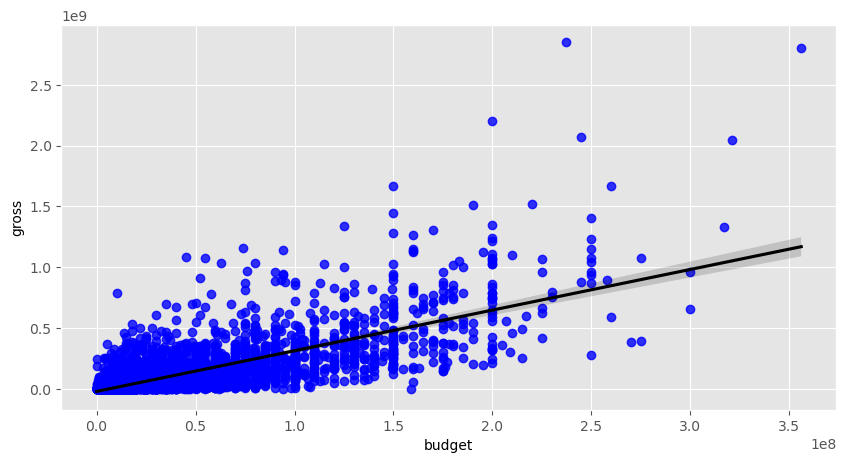

In [118]:
# plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df_cleaned_2, scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})

In [82]:
# above we verified a speculative correlation using visualization, now we find out the correlation by actually computing it.

df_cleaned_2.corr(method = 'pearson') # pearson (default) therefore we put 'method' 

C:\Users\user\AppData\Local\Temp\ipykernel_5044\1297829186.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned_2.corr(method = 'pearson') # pearson (default) therefore we put 'method'


,score,votes,budget,gross,runtime
score,1.000000,0.473809,0.071792,0.222143,0.414694
votes,0.473809,1.000000,0.440021,0.614904,0.352472
budget,0.071792,0.440021,1.000000,0.740395,0.318551
gross,0.222143,0.614904,0.740395,1.000000,0.275631
runtime,0.414694,0.352472,0.318551,0.275631,1.000000


In [83]:
# budget - gross (0.7) (highest)
# gross - votes (0.6)
# score - votes (0.47)
# budget - votes (0.44)
# runtime - votes (0.41)
# this method is good but is lengthy to observe

C:\Users\user\AppData\Local\Temp\ipykernel_5044\386645620.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned_2.corr(method = 'pearson')


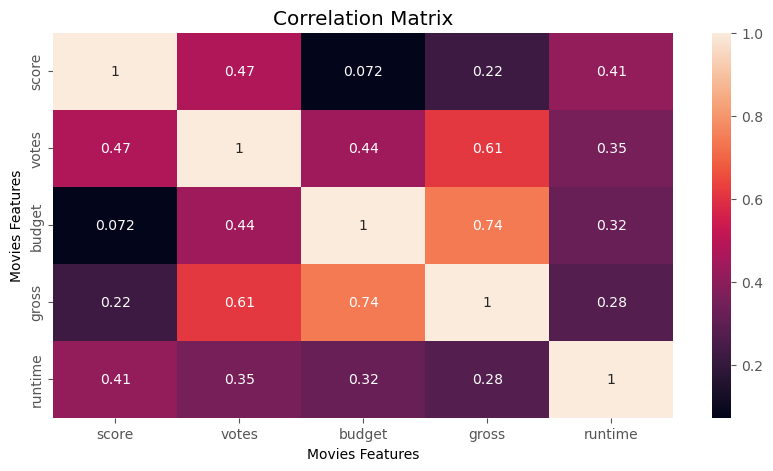

In [87]:
# Visualizing the correlation

corr_matrix = df_cleaned_2.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [86]:
# Lighter the color, higher the correlation. 
# So we look for light colors and the corresponding columns tags to them.

In [ ]:
# gross - budget (highest correlation)
# gross - votes
# votes - score
# budget - votes
# runtime - score
# runtime - votes
# runtime - budget 
# runtime - gross
# gross - score
# budget - score (lowest correlation)

In [88]:
# Another speculative and general correlation is the company.
# Since it is Categorical data we can analyze it further by creating a numeric reprentation of it.

In [90]:
df_numerical = df_cleaned_2

for col_name in df_numerical.columns:
    if(df_cleaned_2[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes

df_numerical

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,387,5,0,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1389,162.0,29
7445,389,5,0,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,988,181.0,39
3045,4923,5,6,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1389,194.0,17
6663,3656,5,0,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,35
7244,390,5,0,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,988,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1471,4.5,1900.0,1810,3112,187,47,5000000,2970,1383,97.0,14
3681,1599,3,6,1726,6.8,43000.0,954,1687,528,6,5000000,2554,468,108.0,21
272,2921,6,9,1530,3.9,2300.0,263,55,1477,47,800000,2270,584,85.0,2
2417,2401,8,6,64,7.3,5100.0,23,1220,1687,26,11900000,596,492,134.0,13


In [119]:
df_cleaned_2

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,U,Drama,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


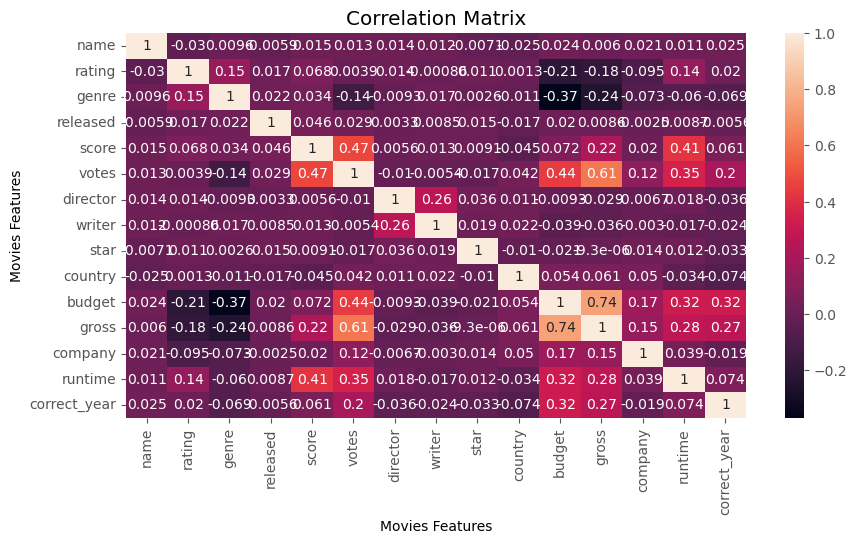

In [120]:
# Visualizing the correlation

corr_matrix = df_numerical.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [121]:
# So obviously! the initial speculation and belief was wrong that the company is correlated to how much money a movie makes. 

In [122]:
df_numerical.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.029987,0.009617,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021440,0.010778,0.024734
rating,-0.029987,1.000000,0.152486,0.017126,0.068304,0.003942,0.014081,-0.000861,0.011267,0.001319,-0.205920,-0.182403,-0.095246,0.137253,0.019748
genre,0.009617,0.152486,1.000000,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.072980,-0.059952,-0.068848
released,-0.005896,0.017126,0.021712,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002522,0.008692,-0.005625
score,0.014955,0.068304,0.034061,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.020352,0.414694,0.061029
votes,0.012915,0.003942,-0.136457,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.118827,0.352472,0.202883
director,0.013699,0.014081,-0.009303,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.006681,0.018077,-0.036281
writer,0.011602,-0.000861,0.017500,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.003029,-0.016891,-0.024397
star,-0.007109,0.011267,0.002619,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.014032,0.012423,-0.033168
country,-0.024555,0.001319,-0.010847,-0.017231,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049936,-0.033611,-0.073732


In [123]:
# unstacking the above matrix to see the relations in a sorted way

corr_mat = df_numerical.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029987
              genre           0.009617
              released       -0.005896
              score           0.014955
                                ...   
correct_year  budget          0.320245
              gross           0.268626
              company        -0.019350
              runtime         0.074251
              correct_year    1.000000
Length: 225, dtype: float64

In [126]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.36890
genre         budget         -0.36890
              gross          -0.24438
gross         genre          -0.24438
rating        budget         -0.20592
                               ...   
released      released        1.00000
genre         genre           1.00000
rating        rating          1.00000
runtime       runtime         1.00000
correct_year  correct_year    1.00000
Length: 225, dtype: float64

In [127]:
# code to display all the rows of the o/p = "pd.set_option('display.max_rows', None)"
# my system crashed the one time I used it, that's why I don't anymore.

In [132]:
high_corr = sorted_pairs[(sorted_pairs) > 0.3]
high_corr

budget        runtime         0.318551
runtime       budget          0.318551
correct_year  budget          0.320245
budget        correct_year    0.320245
runtime       votes           0.352472
votes         runtime         0.352472
score         runtime         0.414694
runtime       score           0.414694
budget        votes           0.440021
votes         budget          0.440021
              score           0.473809
score         votes           0.473809
votes         gross           0.614904
gross         votes           0.614904
budget        gross           0.740395
gross         budget          0.740395
name          name            1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score      

In [133]:
# Therefore the highest correlation is Gross - Budget 
# Gross - votes
# score - votes
